# Ejemplo 3: Comprar o no una casa

<ul>
<li>Ingresos: los ingresos de la familia mensual.</li>

<li>Gastos comunes: pagos de luz, agua, gas, etc mensual.</li>

<li>Pago coche: si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.</li>

<li>Gastos otros: compra en supermercado y lo necesario para vivir al mes.</li>

<li>Ahorros: suma de ahorros dispuestos a usar para la compra de la casa.</li>

<li>Vivienda: precio de la vivienda que quiere comprar esa familia.</li>

<li>Estado civil:</li>

<ul>
<li>0-soltero</li>
<li>1-casados</li>
<li>2-divorciados</li>
</ul>

<li>Hijos: cantidad de hijos menores y que no trabajan.</li>

<li>Trabajo:</li>

<ul>
<li>0-sin empleo</li>
<li>1-autónomo</li>
<li>2-empleado</li>
<li>3-empresario</li>
<li>4-pareja: autónomos</li>
<li>5-pareja: empleados</li>
<li>6-pareja: autónomo y asalariado</li>
<li>7-pareja:empresario y autónomo</li>
<li>8-pareja: empresarios los dos o empresario y empleado</li>
</ul>

<li>Comprar:</li>
<ul>
<li>0-No comprar</li>
<li>1-Compra Comprar o no una casa.</li>
</ul>

<!-- Poner texto en un recuadro -->
<div style="border:3px solid black; padding: 9px; margin: 9px;">
<strong> Tarea: </strong> Realizar k-medias pero usando componentes principales.
¿Hubo una mejoría al usar PCA?
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
from sklearn import datasets
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

# k-medias
from sklearn.cluster import KMeans

# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# No mostrar los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos el archivo CSV con los datos
data = pd.read_csv("C:/Users/GabDomDal/Desktop/Ejercicios/Analitica de datos/Trabajo 22/comprar_alquilar.csv")
display(data)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [ ]:
# Extraemos la información excluyendo las columnas estado_civil, hijos y trabajo (entradas y salida)
x = data.drop(["comprar", "estado_civil", "hijos", "trabajo"], axis=1)
y = data["comprar"]
etiquetas = y.unique()

In [8]:
# Escalamos los datos
escala = StandardScaler()
x = escala.fit_transform(x)

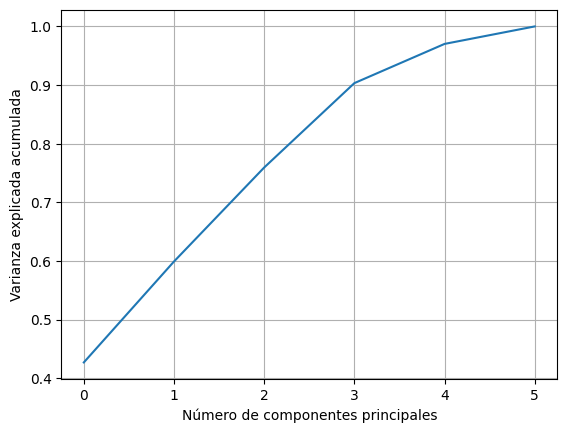

In [9]:
# Para calcular el número de componentes principales, se usa el porcentaje acumulado de varianza explicada
pca = PCA().fit(x)
varianza_explicada = np.cumsum(pca.explained_variance_ratio_)
plt.plot(varianza_explicada)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

En el gráfico de varianza explicada se observa que con 5 componentes principales se explica más del 80% de la varianza. Por lo tanto, se puede elegir reducir la dimensionalidad a 5 componentes principales para el análisis k-medias.

In [10]:
# Se usa PCA para reducir la dimensionalidad a 5 componentes principales
pca = PCA(n_components = 5)
x_c = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.42698481, 0.17213415, 0.16027137, 0.14392002, 0.06685229])

La última varianza de las componentes principales es muy baja, lo que indica que esta componente no aporta mucha información adicional, por lo que se puede considerar eliminarla para simplificar el modelo sin perder demasiada información relevante.

In [11]:
# Se usa PCA para reducir la dimensionalidad a 4 componentes principales
pca = PCA(n_components = 4)
x_c = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.42698481, 0.17213415, 0.16027137, 0.14392002])

Luego, los valores propios de las componentes principales son:

In [12]:
pca.singular_values_

array([22.74874907, 14.44391169, 13.93732048, 13.20723532])

Después, se muestran los coeficientes de cada componente principal respecto a las variables originales:

In [17]:
# Coeficientes de las componentes principales respecto a las variables originales
pd.DataFrame(
	data = pca.components_, 
	columns = data.drop(["comprar", "estado_civil", "hijos", "trabajo"], axis=1).columns,
	index = [f'CP{i+1}' for i in range(pca.n_components_)]
)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda
CP1,0.575769,0.352539,-0.147661,-0.107870,0.522087,0.488050
CP2,-0.087944,-0.398688,-0.528632,0.695463,0.212633,0.158051
CP3,0.110745,0.073581,0.773026,0.600484,0.027912,0.152943
CP4,0.090378,0.746119,-0.297437,0.378503,-0.275890,-0.356777


Con la tabla anterior se deduce que:

<ul>
	<li>La primer componente principal engloba los ingresos, ahorros y precio de la vivienda.</li>
	<li>La segunda componente principal engloba otros gastos.</li>
	<li>La tercer componente principal engloba el pago del coche.</li>
	<li>La cuarta componente principal engloba los gastos comunes.</li>
</ul>

Ahora, se puede proceder a realizar el análisis k-medias con las componentes principales obtenidas.

In [ ]:
# Ahora realizamos k-medias con k=2 usando componentes principales
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_c)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [19]:
# Guardamos las etiquetas que generó el algoritmo
etiquetas = kmeans.fit_predict(x_c)

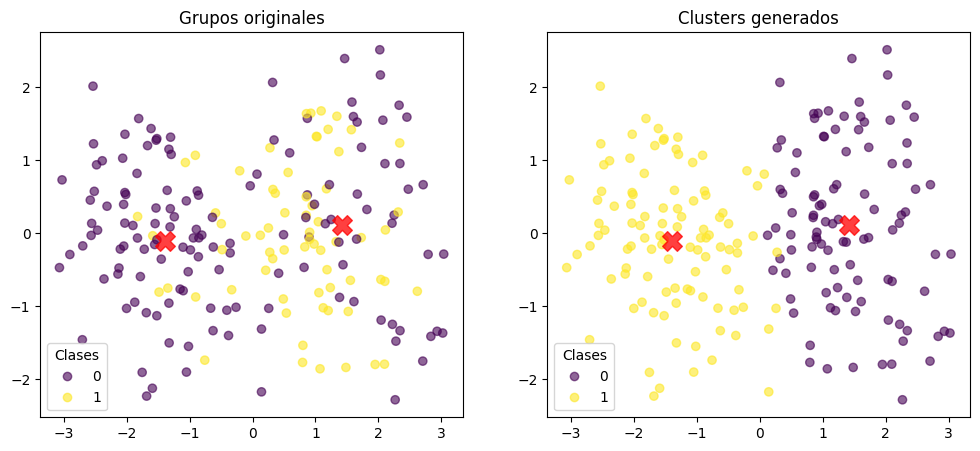

In [20]:
# Graficamos los resultados de k-medias con sus centroides y los comparamos con los originales

# Grupos originales vs clusters generados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de los grupos originales con leyenda
scatter1 = ax1.scatter(x_c[:, 0], x_c[:, 1], c=y, cmap='viridis', alpha=0.6)
ax1.set_title('Grupos originales')
ax1.legend(*scatter1.legend_elements(), title="Clases")

# Gráfico de los clusters generados por k-medias con leyenda
scatter2 = ax2.scatter(x_c[:, 0], x_c[:, 1], c=etiquetas, cmap='viridis', alpha=0.6)
ax2.set_title('Clusters generados')
ax2.legend(*scatter2.legend_elements(), title="Clases")

# Centroides de los clusters
centroids = kmeans.cluster_centers_
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.show()

In [21]:
# Tabla cruzada de los resultados de k-medias
pd.crosstab(y, etiquetas, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,48,87,135
1,52,15,67
All,100,102,202


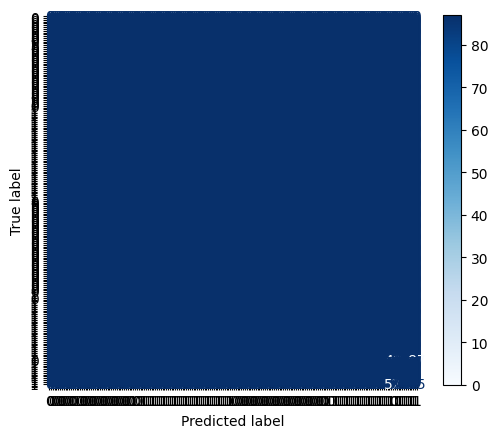

In [30]:
# Matriz de confusión de las etiquetas reales vs las generadas por k-medias

cm = confusion_matrix(y, etiquetas, labels=etiquetas)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etiquetas)
disp.plot(cmap='Blues')

In [ ]:
# Precisión del modelo
precision = np.trace(cm) / np.sum(cm)
precision